# Aprendizado por Reforço

- Bruno Pilão - 202201037911
- Mateus Norcia - 202201038381
- Isabelle -


Este trabalho tem como objetivo aplicar os conceitos fundamentais de Aprendizado por Reforço (Reinforcement Learning) através da modelagem de um Processo de Decisão de Markov (MDP), utilizando o ambiente Taxi-v3 disponível na biblioteca Gymnasium.

O ambiente simula um cenário onde um táxi deve buscar um passageiro em um ponto específico e levá-lo até o destino correto, dentro de um grid (5x5) com obstáculos e paredes. O agente (táxi) aprende a agir por tentativa e erro, buscando maximizar a recompensa acumulada com base nas ações tomadas.

![Ambiente Taxi-v3](img/enviroment_taxi.png)



## 🧩 Definição do Markov Decision Process


### Estados (S):
- O ambiente tem 500 estados possíveis. Cada estado representa:
- Posição do táxi (fila, coluna)
- Local de origem do passageiro (uma das 5 localizações fixas)
    - 0: Vermelho
    - 1: Verde
    - 2: Amarelo
    - 3: Azul
    - 4: No taxi

### Ações (A):
- 0 = Mover para sul
- 1 = Mover para norte
- 2 = Mover para leste
- 3 = Mover para oeste
- 4 = Pegar passageiro
- 5 = Deixar passageiro

### Recompensas
- R(s, a) = −1 por passo.
- Estados (0,1);(0,4);(4,1);(3,4) são terminais com recompensa +20 (depedendo da Localização do Hotel).
- Estado tem recompensa negativa −10, por executar indevidamente as ações de embarque e desembarque.
### Transições (P(s'|s,a)):
Determinísticas, exceto quando o táxi tenta atravessar uma parede, nesse caso, ele permanece no mesmo estado.


In [1]:
# Importando pacotes necessarios compilação collab
! pip install gymnasium numpy matplotlib pandas seaborn tqdm pygame -q


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Criando o ambiente Taxi-v3
env_default = gym.make("Taxi-v3")
env_raining = gym.make("Taxi-v3",is_rainy=True)

In [4]:
# Definindo estados do ambiente
estados=[
 (0, 0), (0, 1), (0, 2), (0, 3), (0, 4),
 (1, 0), (1, 1), (1, 2), (1, 3), (1, 4),
 (2, 0), (2, 1), (2, 2), (2, 3), (2, 4),
 (3, 0), (3, 1), (3, 2), (3, 3), (3, 4),
 (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)
]

#Definindo ações do ambiente
acoes = {
    0: "South ⬇️",
    1: "North ⬆️",
    2: "East ➡️",
    3: "West ⬅️",
    4: "Pickup 🚖",
    5: "Dropoff 🛑"
}

## Equação de Bellman


In [ ]:
# Teste de funcao de Bellman
env_default.action_space.n, env_default.observation_space.n

(np.int64(6), np.int64(500))

In [47]:
def aplicar_bellman(env, gamma=0.9, theta=1e-6):
    """
    Aplica a Equação de Bellman (Value Iteration) a um ambiente Gym.
    Retorna V(s) e um DataFrame com o histórico de convergência.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    V = np.zeros(n_states)
    history = []
    iter_count = 0

    def bellman_update(V):
        delta = 0
        for s in range(n_states):
            v = V[s]
            values = []
            for a in range(n_actions):
                q_sa = 0
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    q_sa += prob * (reward + gamma * V[next_state] * (not done))
                    #print(f"Estado: {s}, Ação: {a}, Próximo Estado: {next_state}, Recompensa: {reward}, Probabilidade: {prob}, Done: {done}")
                values.append(q_sa)
            V[s] = max(values)
            delta = max(delta, abs(v - V[s]))
        
        return V, delta

    while True:
        V, delta = bellman_update(V)
        iter_count += 1
        history.append({
            "Iteração": iter_count,
            "Valor Médio": np.mean(V),
            "Valor Máximo": np.max(V),
            "Delta": delta,
            "V": V.copy()
            
            
        })
        if delta < theta:
            break

    df = pd.DataFrame(history)
    return V, df


In [45]:
print("Aplicando Bellman ao ambiente padrão...")    
V_default, df_default = aplicar_bellman(env_default)

print("Aplicando Bellman ao ambiente com chuva...")
V_raining, df_raining = aplicar_bellman(env_raining)

Aplicando Bellman ao ambiente padrão...
Aplicando Bellman ao ambiente com chuva...


c:\Users\bruno\OneDrive\Desktop\gith\ap1_ibmec_aprendizado_reforco\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


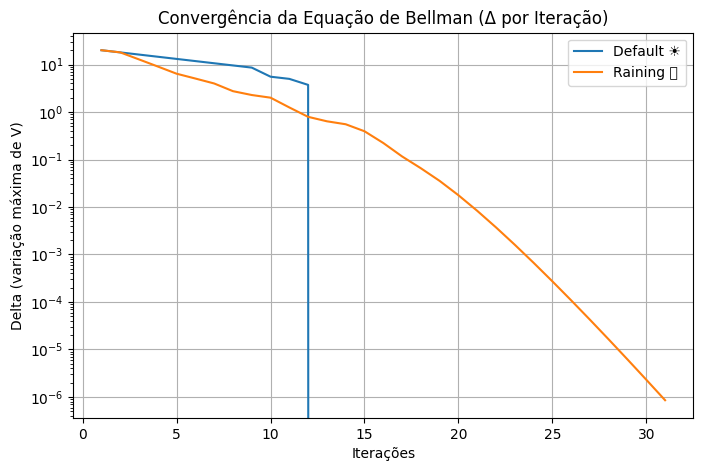

## Recompensas

- -1 Movimento do Taxi.

- +20 Despachar passageiro corretamente.

- -10 Buscar / Despachar passageiro corretamente.